In [1]:
# Write your imports here
import pandas as pd
import itertools as iter
import numpy as np
import re


# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
coffee_initial = pd.read_csv("data/merged_data_cleaned.csv")

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [3]:
def assert_all(func, test_cases: list[tuple[any, any, str]]):
  for (input, expected, message) in test_cases:
    actual = func(input)
    assert actual == expected,  f'{message}. Input: "{input}", epxected: "{expected}", actual: "{actual}"'

test_cases_attribute = "test_cases"

def define_test_cases(func, test_cases: list[tuple[any, any, str]]):
  func.__setattr__(test_cases_attribute, test_cases)

def assert_function_works(func):
  def try_get_name(func): 
    return func.__name__ if callable(func) else func
  assert hasattr(func,test_cases_attribute), f'the provided function "{try_get_name}" has no property {test_cases_attribute}. Consider calling {define_test_cases.__name__} to set them'
  assert_all(func, getattr(func, test_cases_attribute))

In [4]:
(rows_count, columns_count) = coffee_initial.shape

categorical = "categorical"
numerical = "numerical"
other = "other"
numerical_types = [float, int, complex, np.int8, np.int16, np.int32, np.int64 ]

def get_series_type(s: pd.Series):
  categorical_types = [str]
  if (s.dtype in numerical_types):
    return numerical
  if(s.dtype in categorical_types):
    return categorical
  # another try whether all except NaN are strings
  if (all( type(item) == str for item in s.dropna() )):
    return categorical
  return other
  

def get_proposed_features(df: pd.DataFrame):
  return [ (colName, get_series_type(series), series.dtype ) for (colName, series) in [(colName, df[colName]) for colName in df]]
  
def print_proposed_features(df: pd.DataFrame):
  proposed_features = get_proposed_features(df)
  keyfunc =  lambda x: x[1]
  
  for key, group in iter.groupby(sorted(proposed_features, key=keyfunc ), keyfunc ):
    group_as_list = list(group)
    print(f'{key}: {len(group_as_list)}')
    print([ f'{colName}({dtype})' for colName, series_type, dtype in group_as_list])

print(f'observations: {rows_count}')
print(f'features: {columns_count}')
print_proposed_features(coffee_initial)

observations: 1339
features: 44
categorical: 24
['Species(object)', 'Owner(object)', 'Country.of.Origin(object)', 'Farm.Name(object)', 'Lot.Number(object)', 'Mill(object)', 'ICO.Number(object)', 'Company(object)', 'Altitude(object)', 'Region(object)', 'Producer(object)', 'Bag.Weight(object)', 'In.Country.Partner(object)', 'Harvest.Year(object)', 'Grading.Date(object)', 'Owner.1(object)', 'Variety(object)', 'Processing.Method(object)', 'Color(object)', 'Expiration(object)', 'Certification.Body(object)', 'Certification.Address(object)', 'Certification.Contact(object)', 'unit_of_measurement(object)']
numerical: 20
['Unnamed: 0(int64)', 'Number.of.Bags(int64)', 'Aroma(float64)', 'Flavor(float64)', 'Aftertaste(float64)', 'Acidity(float64)', 'Body(float64)', 'Balance(float64)', 'Uniformity(float64)', 'Clean.Cup(float64)', 'Sweetness(float64)', 'Cupper.Points(float64)', 'Total.Cup.Points(float64)', 'Moisture(float64)', 'Category.One.Defects(int64)', 'Quakers(float64)', 'Category.Two.Defects(i

In [5]:
numerical = "numerical"
other = "other"

def get_series_type(s: pd.Series):
  numerical_types = [float, int, complex, np.int8, np.int16, np.int32, np.int64 ]
  categorical_types = [str]
  if (s.dtype in numerical_types):
    return numerical
  if(s.dtype in categorical_types):
    return categorical
  # another try whether all except NaN are strings
  if (all( type(item) == str for item in s.dropna() )):
    return categorical
  return other
  

def get_proposed_features(df: pd.DataFrame):
  return [ (colName, get_series_type(series), series.dtype ) for (colName, series) in [(colName, df[colName]) for colName in df]]
  
def print_proposed_features(df: pd.DataFrame):
  proposed_features = get_proposed_features(df)
  keyfunc =  lambda x: x[1]
  
  for key, group in iter.groupby(sorted(proposed_features, key=keyfunc ), keyfunc ):
    group_as_list = list(group)
    print(f'{key}: {len(group_as_list)}')
    print([ f'{colName}({dtype})' for colName, series_type, dtype in group_as_list])

print(f'observations: {rows_count}')
print(f'features: {columns_count}')
print_proposed_features(coffee_initial)

observations: 1339
features: 44
categorical: 24
['Species(object)', 'Owner(object)', 'Country.of.Origin(object)', 'Farm.Name(object)', 'Lot.Number(object)', 'Mill(object)', 'ICO.Number(object)', 'Company(object)', 'Altitude(object)', 'Region(object)', 'Producer(object)', 'Bag.Weight(object)', 'In.Country.Partner(object)', 'Harvest.Year(object)', 'Grading.Date(object)', 'Owner.1(object)', 'Variety(object)', 'Processing.Method(object)', 'Color(object)', 'Expiration(object)', 'Certification.Body(object)', 'Certification.Address(object)', 'Certification.Contact(object)', 'unit_of_measurement(object)']
numerical: 20
['Unnamed: 0(int64)', 'Number.of.Bags(int64)', 'Aroma(float64)', 'Flavor(float64)', 'Aftertaste(float64)', 'Acidity(float64)', 'Body(float64)', 'Balance(float64)', 'Uniformity(float64)', 'Clean.Cup(float64)', 'Sweetness(float64)', 'Cupper.Points(float64)', 'Total.Cup.Points(float64)', 'Moisture(float64)', 'Category.One.Defects(int64)', 'Quakers(float64)', 'Category.Two.Defects(i

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [6]:
def to_snake_case(input: str, separator = '.'):
  if(type(input) != str):
    return input
  stripped_input = input.strip()
  split_values = [ val.strip().lower() for val in stripped_input.split(separator) if len(val.strip()) > 0]
  if (len(split_values) == 1):
    return split_values[0]
  return '_'.join(split_values)

define_test_cases(to_snake_case, [
  (5, 5, 'If nto a string - should not modify the input'),
  ('Petar', 'petar', 'Should lowercase the input'),
  ('Price. noVAT', 'price_novat', 'should sanitize the split parts'),
  ('sales_count','sales_count', 'Should not modify the input'),
  ('  sales_count ','sales_count', 'Should trim leading and trailing spaces'),
])

assert_function_works(to_snake_case)
 
coffee_initial_renames = coffee_initial.rename(to_snake_case, axis='columns')
coffee_initial_renames.columns

Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [7]:
no_measure = 'no_measure'
no_value = 'no_value'

def extract_value_components(input: str) -> tuple[float | None, str]:
  if (type(input) != str):
    return no_measure  
  stripped_input = input.strip()
  split_values = [ val.strip().lower() for val in stripped_input.split(' ') if len(val.strip()) > 0]
  if (len(split_values) == 0):
    return (None, no_value)
  if (len(split_values) == 1):
    return (None, no_measure)
  value = None
  try:
    value = float(split_values[0])
  except ValueError:
    print(f'Provided value {split_values[0]} is nto a float')
  return (value, ' '.join(split_values[1:]))

def extract_measrure(input: str):
  (_, unit) = extract_value_components(input)
  return unit

def extract_value_as_float(input: str):
  (value, _) = extract_value_components(input)
  return value
  

def get_all_measures(series: pd.Series) -> list[tuple[str, int]] :
  series_no_na = series.dropna()
  return [
    (key, len(list(group))) for
    key, group in
    iter.groupby(sorted(series_no_na, key=extract_measrure), extract_measrure)]

bag_weight_all_measures = get_all_measures(coffee_initial_renames.bag_weight)

print('All units')
print(bag_weight_all_measures)

All units
[('kg', 1196), ('kg,lbs', 2), ('lbs', 114), ('no_measure', 27)]


The **bag_weight** series should be weight. We see mixed value with or withut measures. Some are in kg, others are in lbs.
We have values in `kg`, values in `lbs` and values without `unit`.
Our approach would be to convert the data as follows:
1. If unit is `lbs` -> we will convert it using $ f(x)_{x \text{ in lbs}} = 0.45359237*x \text{ kg} $
2. For unit `kg,lbs` or those without `unit` - we will assign NA value to them.

In the end we will remove the unit and cast the column as float

In [8]:
def get_wight_as_float(input: str | None, none_values = ['kg,lbs']) -> float:
  if (input is None):
    return input
  assert type(input) is str, f'Incorrect input param. String or None is required. Provided: ${type(input)}'
  (value, unit) = extract_value_components(input)
  if ([no_measure, no_value].count(unit)):
    return None
  if(none_values.count(unit)):
    return None
  if (unit == 'lbs'):
    return value*0.45359237
  return value

define_test_cases(get_wight_as_float, [
  (None, None, 'Should return None if none i provided'),
  ('', None, 'No value should return None'),
  ('5 ', None, 'No measure should return None'),
  ('15  kg,lbs', None, 'Both units should return None'),
  ('1 lbs', 0.45359237, 'Should convert lbs to kg'),
  ('15.6 kg', 15.6, 'Should just extract the value if unit is kg')
])

assert_function_works(get_wight_as_float)

coffee_initial_renames.bag_weight = coffee_initial_renames.bag_weight.apply(get_wight_as_float)
coffee_initial_renames.bag_weight.describe()


count     1310.000000
mean       182.608718
std       1540.260390
min          0.000000
25%          1.000000
50%         50.000000
75%         69.000000
max      19200.000000
Name: bag_weight, dtype: float64

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [9]:
def get_harvest_year(input: str | None, min = 2000, max = 2050) -> int | None:
  def to_int_year(input: any) -> int | None:
    int_val = int(input)
    return int_val if min <= int_val and int_val <= max else None

  if (input is None):
    return input
  if(numerical_types.count(type(input)) > 0):
    return None if np.isnan(input) else to_int_year(input)
  all_matches = re.findall('\\d\\d\\d\\d', input)
  if (len(all_matches) == 0):
    return None
  return to_int_year(all_matches[0])

  
  
assert_all(get_harvest_year,[
  (None, None, 'If none provided, should return None'),
  ('Test', None, 'If no year can be found, return None'),
  ('Martch 2008', 2008, 'If year is found, return it correct'),
  ('Sept 2009 - April 2010', 2009, 'Should return the first met year'),
  ('2012', 2012, 'Should jsut parse the date'),
  ('1567', None, 'Should return None if year is less tahn min'),
  ('3569', None, 'Should return None if year is more than max value'),
  (2012.0, 2012, 'Should convert float to int'),
  (np.NaN, None, 'Should return none if valeu is float Nan')
])

coffee_initial_renames.harvest_year = coffee_initial_renames.harvest_year.apply(get_harvest_year)
coffee_initial_renames.harvest_year.describe()

coffee_initial_renames.expiration = pd.to_datetime(coffee_initial_renames.expiration, format='mixed')
coffee_initial_renames.grading_date = pd.to_datetime(coffee_initial_renames.grading_date, format='mixed')

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [10]:
original_pandas_max_columns = pd.get_option('display.max_columns')
# pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 50)
coffee_initial_renames.loc[coffee_initial_renames["country_of_origin"].isna()]

,unnamed: 0,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1197,1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,NaN,NaN,149,70.0,Almacafé,NaN,2011-03-01,Racafe & Cia S.C.A,NaN,NaN,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,79.08,0.1,0,0.0,NaN,3,2012-02-29,Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


We see that we have only one record without country of origin. We can try to get the `country_of_origin`, based on the `in_country_partner`

In [11]:
print(coffee_initial_renames.loc[coffee_initial_renames['in_country_partner'].eq('Almacafé')].groupby('country_of_origin')['country_of_origin'].count())

country_of_origin
Colombia         171
United States      6
Name: country_of_origin, dtype: int64


Unfortunately this seems very wrong assumption.
So we leave it like this

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [17]:
coffee_initial_renames[['owner', 'owner_1', 'producer']]

,owner,owner_1,producer
0,metad plc,metad plc,METAD PLC
1,metad plc,metad plc,METAD PLC
2,grounds for health admin,Grounds for Health Admin,NaN
3,yidnekachew dabessa,Yidnekachew Dabessa,Yidnekachew Dabessa Coffee Plantation
4,metad plc,metad plc,METAD PLC
...,...,...,...
1334,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1335,luis robles,Luis Robles,Café Robusta del Ecuador S.A.
1336,james moore,James Moore,Cafe Cazengo
1337,cafe politico,Cafe Politico,NaN


When we look , we may think the owner is a lowered case version of the owner_1. But we need to verify that Hypothesis. 

In [16]:
def are_owners_the_same(owner: str, owner_1: str) -> bool:
    if (type(owner) in numerical_types or type(owner_1) in numerical_types):
        return np.isnan(owner) and np.isnan(owner_1)
    return owner == owner_1.lower()



for index, row in coffee_initial_renames.iterrows():
    owner = row['owner']
    owner_1 = row['owner_1']
    if ( not are_owners_the_same(owner, owner_1)):
        print(f'We found differences in "{owner}" "{owner_1}"')

We found differences in "ceca, s.a." "CECA,S.A."
We found differences in "federacion nacional de cafeteros" "Federación Nacional de Cafeteros"
We found differences in "klem organics" "KlemOrganics"
We found differences in "lin, che-hao krude 林哲豪" "Lin, Che-Hao Krude 林哲豪
"
We found differences in "klem organics" "KlemOrganics"
We found differences in "cqi taiwan icp cqi台灣合作夥伴" "CQI Taiwan ICP CQI台灣合作夥伴
"


`owner` is lowere case version of `owner_1` with neglible diffrences as shown above. So we can remove the `owner_1`

In [28]:
coffee_no_owner = coffee_initial_renames.drop(columns=['owner_1'])

Now lets see what is the connection with Producer. We will try to identify whether a producer alwsy works with one owner or vice verca.


In [45]:
producer_has_more_tha_one_owner = False
for name, group in coffee_no_owner.groupby(['producer']):
  unique_values = group["owner"].dropna().unique()
  if (len(unique_values) > 1):
    producer_has_more_tha_one_owner = True
    print(f'Producer = "{name}"')
    print(unique_values)
    break
if (producer_has_more_tha_one_owner):
  print('We foudn that a producer to ower is at least one to may repaltionship')
else:
  print('Producer has only one owner')

ower_has_more_than_one_producer = False
for name, group in coffee_no_owner.groupby(['owner']):
  unique_values = group["producer"].dropna().unique()
  if (len(unique_values) > 1):
    print(f'Owner = "{name}"')
    print(unique_values)
    ower_has_more_than_one_producer = True
    break
    
    
if(ower_has_more_than_one_producer):
  print('Owner to Producer is at least one to many relatioship')
else:
  print('Owner has only one producer')


Producer = "('-',)"
['taylor winch (coffee) ltd.' 'cqi taiwan icp cqi台灣合作夥伴'
 'juan luis alvarado romero']
We foudn that a producer to ower is at least one to may repaltionship
Owner = "('adam ciruli ye',)"
["Alicia's Farm" 'Yunnan Louis Herbs R&D Center']
Owner to Producer is at least one to many relatioship


#### The conclusion is that PRoducer to Owner is Many to Many relatioship. We cannot say anything more.

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [69]:
coffee_initial_renames.pivot_table(columns='color',  index='country_of_origin', values='owner', aggfunc='count')
    

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14.0,12.0,92.0
Burundi,NaN,NaN,1.0
China,NaN,NaN,16.0
Colombia,7.0,8.0,118.0
Costa Rica,10.0,9.0,28.0
Cote d?Ivoire,NaN,1.0,NaN
Ecuador,2.0,1.0,NaN
El Salvador,2.0,2.0,9.0
Ethiopia,NaN,2.0,15.0


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

array([[<Axes: title={'center': 'aroma'}>,
        <Axes: title={'center': 'flavor'}>,
        <Axes: title={'center': 'aftertaste'}>],
       [<Axes: title={'center': 'acidity'}>,
        <Axes: title={'center': 'body'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'uniformity'}>,
        <Axes: title={'center': 'clean_cup'}>,
        <Axes: title={'center': 'sweetness'}>],
       [<Axes: title={'center': 'cupper_points'}>,
        <Axes: title={'center': 'total_cup_points'}>,
        <Axes: title={'center': 'moisture'}>]], dtype=object)

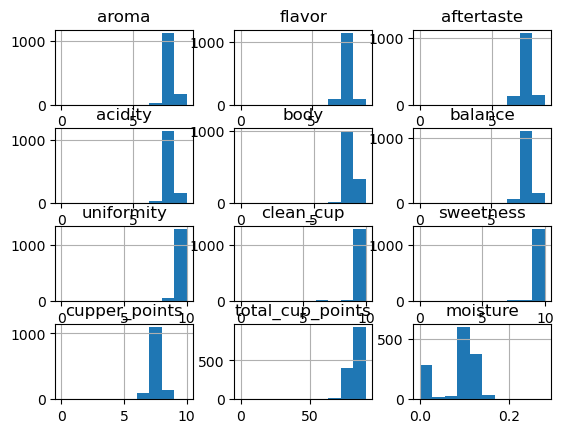

In [79]:
# coffee_no_owner[['aroma', 'flavor', 'moisture']].hist()
coffee_initial_renames.loc[:,'aroma':'moisture'].hist()
# coffee_no_owner.aroma.describe().T


### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!